<a href="https://colab.research.google.com/github/mongamae-nioh/people-flow-data-visualization/blob/master/%E6%9C%AD%E5%B9%8C%E3%83%81%E3%82%AB%E3%83%9B%E4%BA%BA%E6%B5%81%E3%82%AA%E3%83%BC%E3%83%97%E3%83%B3%E3%83%87%E3%83%BC%E3%82%BF%E5%8F%AF%E8%A6%96%E5%8C%96_%E6%AF%94%E8%BC%83%E5%AF%BE%E8%B1%A1%E8%A8%AD%E5%AE%9A%E6%B8%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install japanize-matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

In [0]:
# オープンデータをデータフレームへ格納する
data_url1 = 'https://ckan.pf-sapporo.jp/dataset/224cede7-c57d-47d9-9279-23264058286e/resource/6f25d9c3-bd01-4430-96a0-03ac53b50ef4/download/sm201903.csv'
data_url2 = 'https://ckan.pf-sapporo.jp/dataset/224cede7-c57d-47d9-9279-23264058286e/resource/86e3c4c5-2784-41de-9256-1cb04ca4ecd7/download/sm202003.csv'

df1 = pd.read_csv(data_url1, header=0,  names=('日時', '計測ポイント', '札幌から大通り', '大通りから札幌', '合計', '補正'))
df2 = pd.read_csv(data_url2, header=0,  names=('日時', '計測ポイント', '札幌から大通り', '大通りから札幌', '合計', '補正'))

In [0]:
# 指定日・指定計測ポイントの人流をデータフレームへ格納する関数
def create_df1(place, date):
  df_a = df1[df1['計測ポイント'] == place]
  df_b = df_a[df_a['日時'].str.contains(date)]
  return df_b

def create_df2(place, date):
  df_c = df2[df2['計測ポイント'] == place]
  df_d = df_c[df_c['日時'].str.contains(date)]
  return df_d

In [0]:
# 人流を比較するグラフを表示する関数
def display_graph(graphtitle, labelx, labely, targetdata, place, date1, date2):
#  x1_value = y1_value = x2_value = y2_value = []
  x1_value = []
  y1_value = []
  x2_value = []
  y2_value = []

  fig, ax = plt.subplots(figsize=(40,20))
  c1,c2 = "blue","red" 
  l1 = "コロナ前: " + date1  # 各ラベル
  l2 = "コロナ後: " + date2  # 各ラベル

  data_frame1 = create_df1(place, date1)
  data_frame2 = create_df2(place, date2)

  i = 0 
  for i in range(len(data_frame1)):
    x1_value.append(str(data_frame1.iloc[i]["日時"])[10:16])
    y1_value.append(data_frame1.iloc[i][targetdata])
    i += 1

  j = 0
  for j in range(len(data_frame2)):
    x2_value.append(str(data_frame2.iloc[j]["日時"])[10:16])
    y2_value.append(data_frame2.iloc[j][targetdata])
    j += 1

  fontsize = 30

  ax.set_xlabel('時間', fontsize=fontsize)  # x軸ラベル
  ax.set_ylabel('人数', fontsize=fontsize)  # y軸ラベル
  ax.set_title(graphtitle, fontsize=fontsize) # グラフタイトル
  ax.grid()            # 罫線
  ax.plot(x1_value, y1_value, color=c1, label=l1, linewidth = 3.0)
  ax.plot(x2_value, y2_value, color=c2, label=l2, linewidth = 3.0)
  ax.legend(loc=0, fontsize=fontsize)    # 凡例
  fig.tight_layout()  # レイアウトの設定
  plt.show()

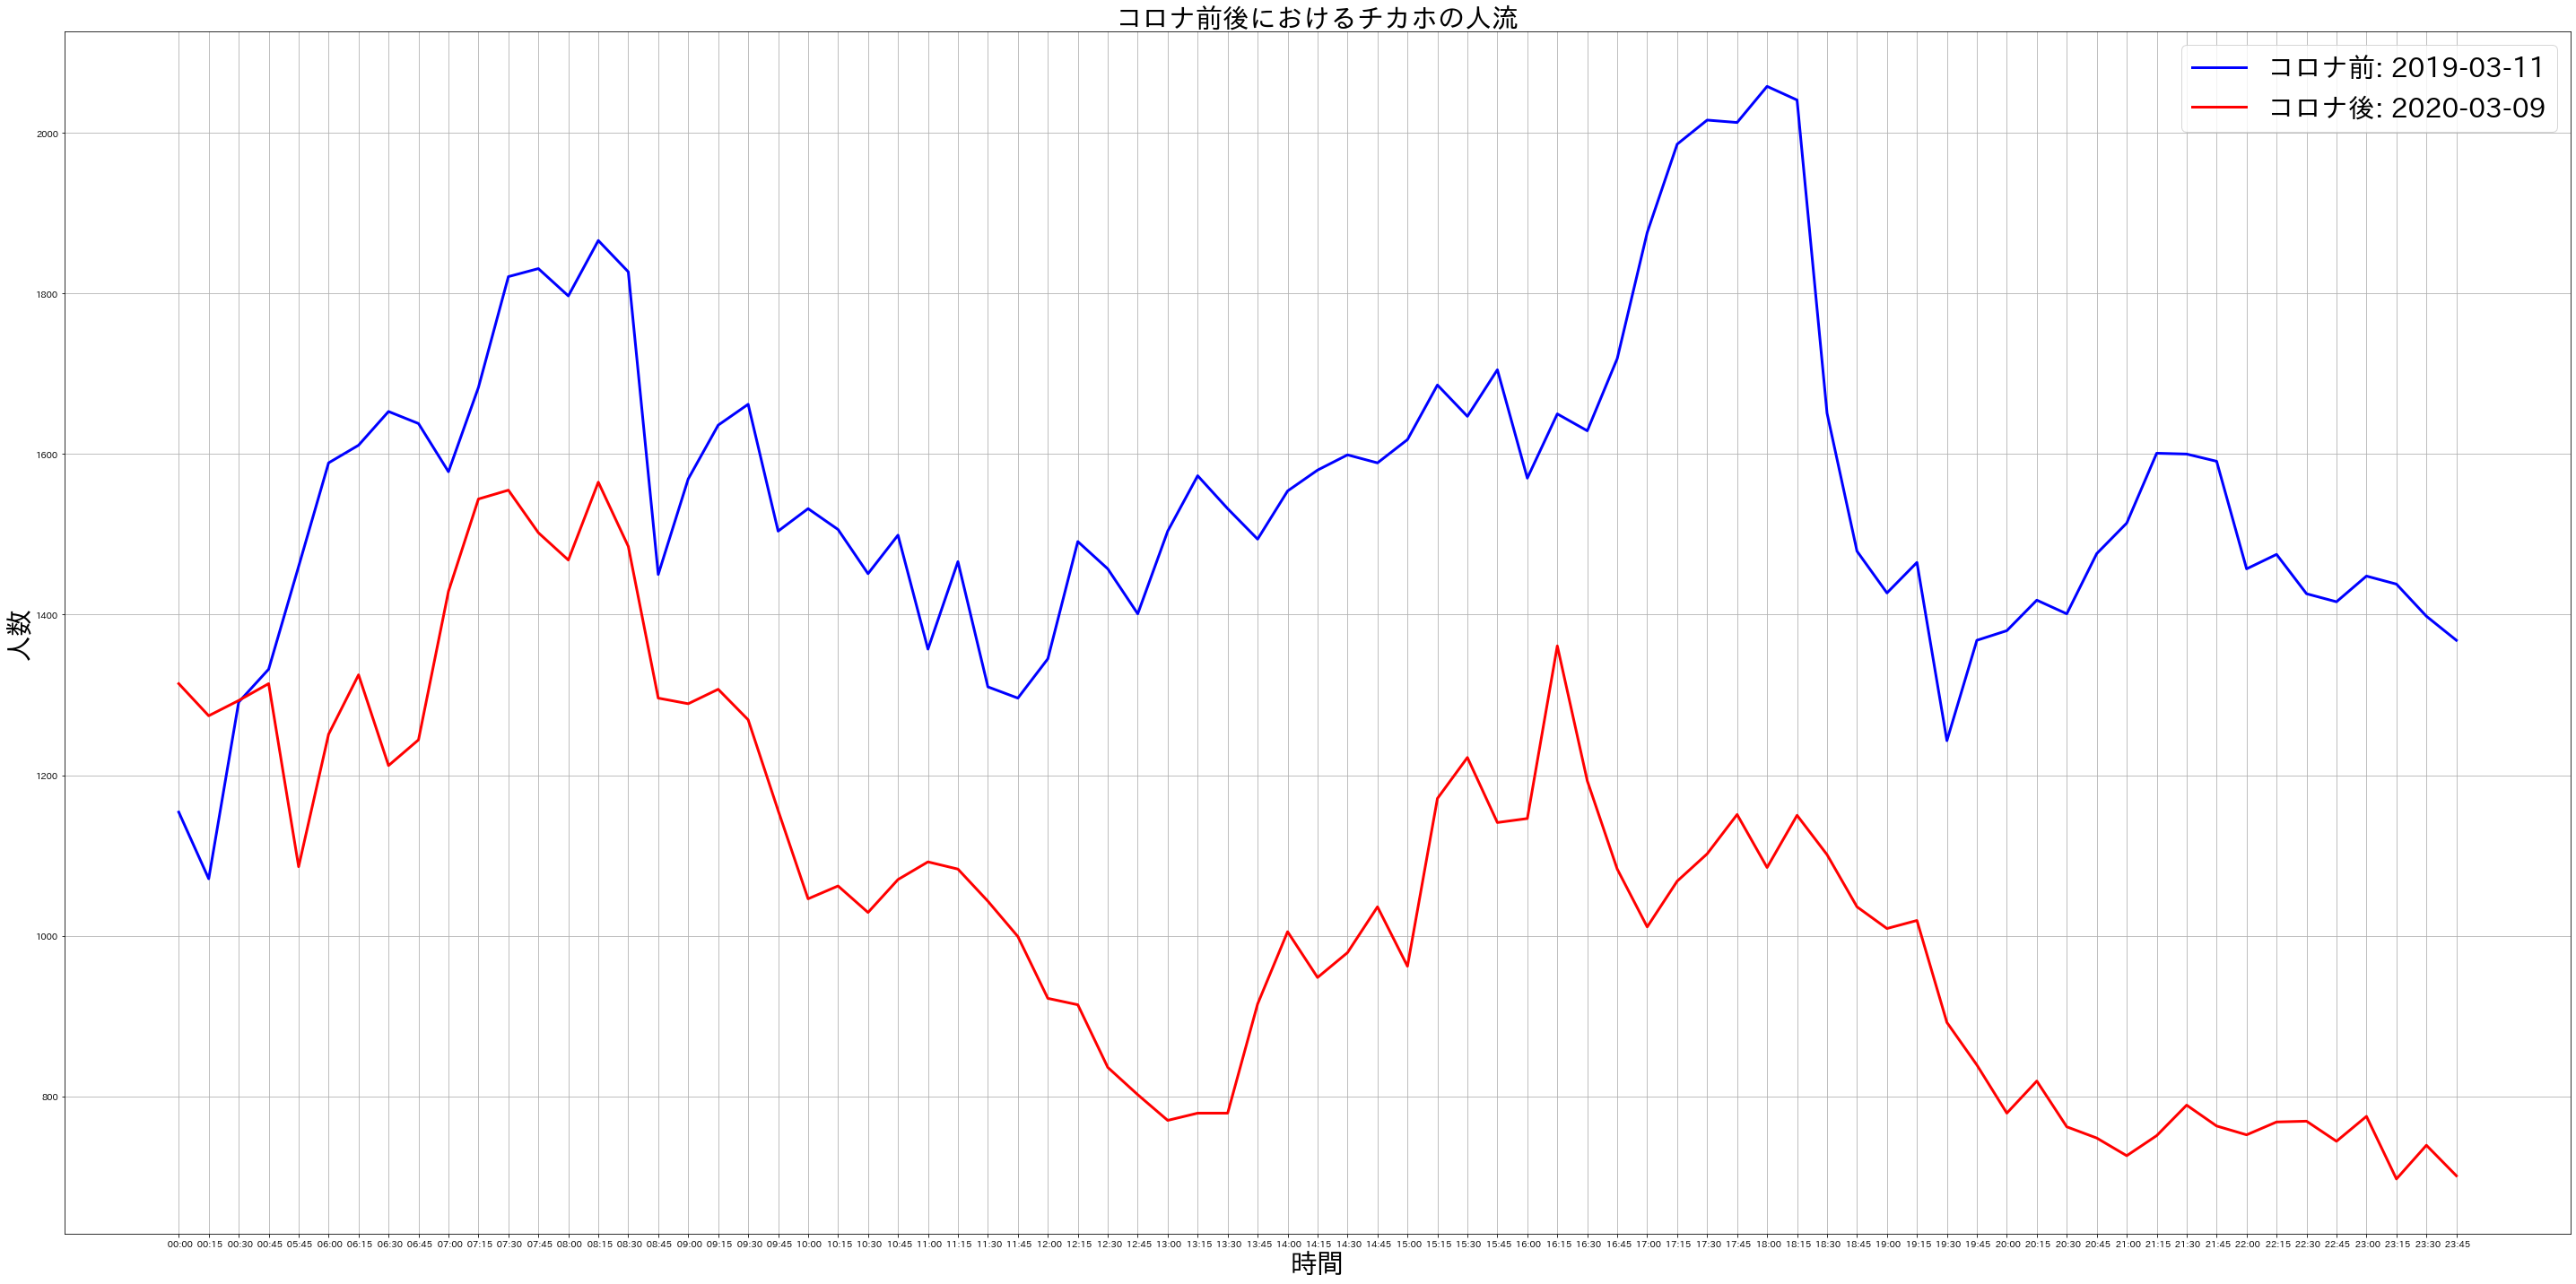

In [0]:
display_graph('コロナ前後におけるチカホの人流', '時間', '人流', '合計', 'J4', '2019-03-11', '2020-03-09')